![alt text](Capture8.png "Title")

###  <font color=red>Working with MNIST Dataset</font> ###

__In this question, you are given the MNIST dataset, which consists of 70,000 images of digits handwritten by students and employees of US Census Bureau.__

You are supposed to perform a binary classification task, separating digit 4 from others (0,1,2,3,5,6,7,8,9). The data could be downloaded using the code below:

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np

# This will take less than a minute to run.

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

### <font color=green>1:</font> ###

__In the first step, you are going to get acquainted with the dataset.__

Randomly, plot three digits from the dataset.

[50496  9372 10201 37597]


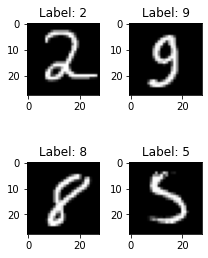

In [ ]:
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randint
seed(10)


images = np.reshape(X,((len(X),28,28)))
fig = plt.figure
num_row = 2
num_col = 2
num = 4
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
random_images = randint(0, len(images), num)
print(random_images)
i = 0
for c in random_images:
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[c], cmap='gray')
    ax.set_title('Label: {}'.format(y[c]))
    i = i + 1
plt.tight_layout()
plt.show()




### <font color=green>2:</font> ###
__In the second step, you should build your dataset. Do as follows:__
* Split your training and testing dataset (80% and 20%).
* Set the random_state to 10.
* As your goal is to identify digit 4, create the target vectors for this classification task  <font color=red>(note that you are training a binary classifier)</font>

In [ ]:
from sklearn.model_selection import train_test_split

labels = np.copy(y)
labels[labels!='4'] = False
labels[labels=='4'] = True
labels = np.asarray(labels, dtype = np.bool)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=10)

### <font color=green>3:</font> ###
__Do the classification task using a <font color=red>Gaussian Naive Bayes Classifier</font>__:
Because MNIST have zero variance in some features, we must use a var smoothing to cope this problem.

In [ ]:
from sklearn.naive_bayes import GaussianNB   

clf = GaussianNB(var_smoothing = 0.035)  
# fitting the classifier
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=0.035)

### <font color=green>4:</font> ###
__Calculate the following values:__
* Confusion Matrix
* Accuracy
* Sensitivity
* Specificity
* Precision
* Recall

In [ ]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

print("The accuracy of the model is: %.1f%%" % (accuracy_score(y_test, y_pred)*100))

The accuracy of the model is: 80.5%


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_test, y_pred)

print(confusion_mtx)

[[9948 2661]
 [  75 1316]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

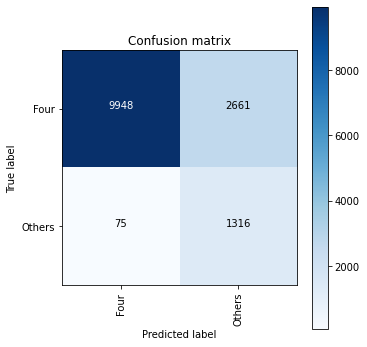

In [ ]:
class_names = ['Four', "Others"]
plot_confusion_matrix(confusion_mtx, class_names)

In [ ]:
# 1

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

        Four       0.99      0.79      0.88     12609
      Others       0.33      0.95      0.49      1391

    accuracy                           0.80     14000
   macro avg       0.66      0.87      0.68     14000
weighted avg       0.93      0.80      0.84     14000



### <font color=green>5:</font> ###
__Now plot <font color=red>the ROC curve</font>, then calculate <font color=red>Area Under ROC (AUROC)</font>__

In [ ]:
from sklearn.metrics import roc_curve, auc 
def _roc(_y_test, _y_prediction):
  falseAlarm, hit, threshold = roc_curve(_y_test, _y_prediction)
  roc_auc =  auc(falseAlarm, hit)
  plt.figure()
  plt.plot(falseAlarm, hit, color='r')
  plt.xlabel("FA")
  plt.ylabel("Hit")
  print("AUC: ", roc_auc)

AUC:  0.9426768243034329


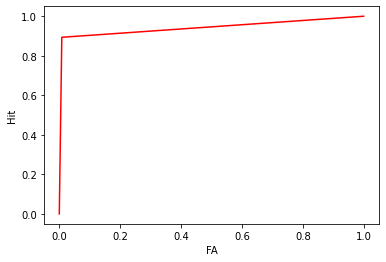

In [ ]:
_roc(y_test, y_pred)

### <font color=green>6:</font> ###
__Finally, apply a 5-fold cross validation, and report your <font color=red>mean and std values</font>.__

In [ ]:
from sklearn.model_selection import cross_val_score

acc = cross_val_score(clf, X, labels, cv=5, scoring='accuracy')

print(acc)

[0.80842857 0.804      0.80214286 0.81085714 0.80271429]


In [ ]:
print("Our accuracy is: %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100))

Our accuracy is: 80.56% +- 0.34%


### <font color=green>7:</font> ###
__How are your results?__

__Is <font color=red>Gaussian Naive Bayes Classifier</font> a good one for this problem?__ It has an 80% performance. It seems, assumption of indepence is not realistic here. beceause each class has same neighbours for its pixels

### __Repeat all the steps using <font color=green>Nearest Centroid Classifier</font> and <font color=green>Logistic Regression Classifier</font>.__ ### 
* You just need to make some changes to step 3!
* You should report all the values in steps 4, 5, and 6

The accuracy of the model is: 87.3%
[[10944  1665]
 [  119  1272]]
              precision    recall  f1-score   support

        Four       0.99      0.87      0.92     12609
      Others       0.43      0.91      0.59      1391

    accuracy                           0.87     14000
   macro avg       0.71      0.89      0.76     14000
weighted avg       0.93      0.87      0.89     14000

Our accuracy is: 87.06% +- 0.37%
AUC:  0.8912007495929528


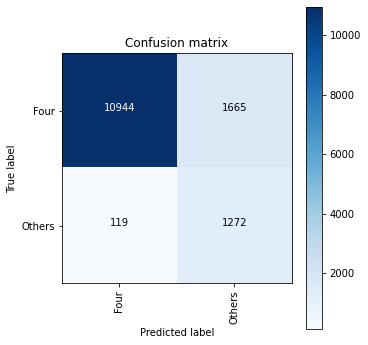

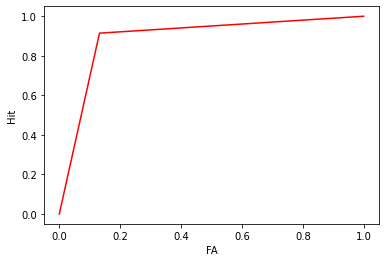

In [ ]:
from sklearn.neighbors import NearestCentroid

clf_nearest = NearestCentroid(metric='euclidean')

# fitting the classifier
clf_nearest.fit(X_train, y_train)

y_pred = clf_nearest.predict(X_test)

from sklearn.metrics import accuracy_score

print("The accuracy of the model is: %.1f%%" % (accuracy_score(y_test, y_pred)*100))
confusion_mtx = confusion_matrix(y_test, y_pred)

print(confusion_mtx)

class_names = ['Four', "Others"]
plot_confusion_matrix(confusion_mtx, class_names)
print(classification_report(y_test, y_pred, target_names=class_names))

acc = cross_val_score(clf_nearest, X, labels, cv=5, scoring='accuracy')
#print(acc)
print("Our accuracy is: %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100))
_roc(y_test, y_pred)
#metrics.plot_roc_curve(clf, X_test, y_test)  # doctest: +SKIP

The accuracy of the model is: 98.2%
[[12505   104]
 [  148  1243]]
              precision    recall  f1-score   support

        Four       0.99      0.99      0.99     12609
      Others       0.92      0.89      0.91      1391

    accuracy                           0.98     14000
   macro avg       0.96      0.94      0.95     14000
weighted avg       0.98      0.98      0.98     14000

[0.98135714 0.98107143 0.98092857 0.98278571 0.98478571]
Our accuracy is: 98.22% +- 0.15%
AUC:  0.9426768243034329


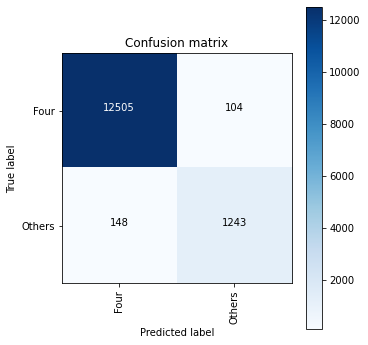

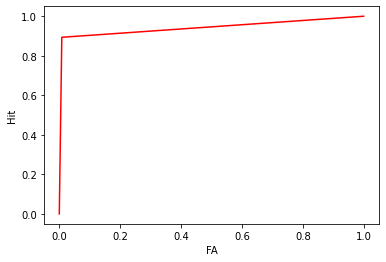

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)
X_scaled = scaler.transform(X)

clf = LogisticRegression(max_iter=100, tol = 100)


# fitting the classifier
clf.fit(X_scaled_train, y_train)

y_pred = clf.predict(X_scaled_test)

from sklearn.metrics import accuracy_score

print("The accuracy of the model is: %.1f%%" % (accuracy_score(y_test, y_pred)*100))
confusion_mtx = confusion_matrix(y_test, y_pred)

print(confusion_mtx)

class_names = ['Four', "Others"]
plot_confusion_matrix(confusion_mtx, class_names)
print(classification_report(y_test, y_pred, target_names=class_names))
acc = cross_val_score(clf, X_scaled, labels, cv=5, scoring='accuracy')
print(acc)
print("Our accuracy is: %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100))
#metrics.plot_roc_curve(clf, X_test, y_test)  # doctest: +SKIP
_roc(y_test, y_pred)

**Logistic Regression is the best model. It's a discriminative model and when we have enough data for trainin; it could reach high accuracy.
Naive Bayes, is a generative algorithm. This algorithm, assume a strong independece between features, and this could lead to high error; but this generative algorithm is faster than others.
Neares centroid performance has a good performance on mnist(better than Naive but can not reach the accuracy of Logistic); because each class of mnist; have similar pixels, so the average of classes are separable.**

_________________________________________________________

### <font color=blue>I hope you learned all the materials covered in the hands-on sessions.</font> ###
### <font color=blue>Good luck :)</font> ###